In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

sns.set(style="white")

import warnings
warnings.filterwarnings('ignore')


In [36]:
# load data:
full_data = pd.read_csv('data.csv')

In [3]:
full_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [4]:
full_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [37]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [38]:
NaN_replacements = {"children": 0,"country": "Unknown", "agent": 0, "company": 0}
full_data_clean = full_data.fillna(NaN_replacements)
#All the undefined meals are considered as SC meals
full_data_clean["meal"].replace("Undefined", "SC", inplace=True)
#Data points with 0 occupants(0 adults + 0 children + 0 babies) are removed
zero_guests = list(full_data_clean[full_data_clean["adults"]
                   + full_data_clean["children"]
                   + full_data_clean["babies"]==0].index)
full_data_clean.drop(full_data_clean.index[zero_guests], inplace=True)

In [39]:
full_data_clean.to_csv(r'Hotel3.csv', index = False)

In [40]:
full_data_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [41]:
# #Separating the data on the basis of hotels
# resort = full_data_clean[full_data_clean['hotel'] == 'Resort Hotel']
# city = full_data_clean[full_data_clean['hotel'] == 'City Hotel']

In [42]:
# city.head()

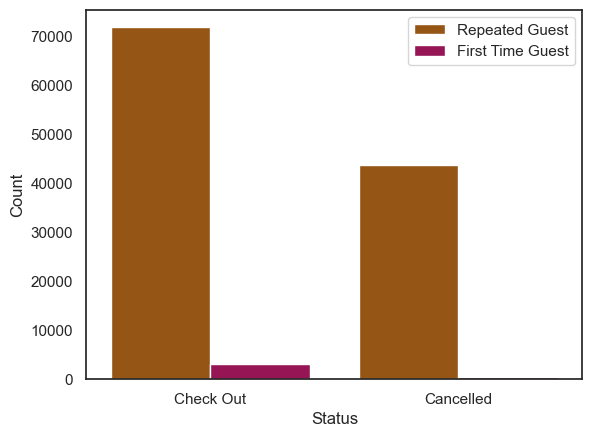

In [11]:
#Let's check how many have cancelled their booking in the respective hotels

ax = sns.countplot(x="is_canceled", hue="is_repeated_guest", data=full_data_clean, palette = 'brg_r')
ax.set(xlabel='Status', ylabel='Count')
positions = (0, 1)
labels = ("Check Out", "Cancelled")
ax.set_xticklabels(labels)
LAB = {'Repeated Guest','First Time Guest'}
ax.legend(labels=LAB)

In [12]:
# #Now we extract those bookings which havent been cancelled and analyze it
# rc = resort[resort['is_canceled'] == 0]
# cc = city[city['is_canceled'] == 0]

Text(0, 0.5, 'Number of Bookings')

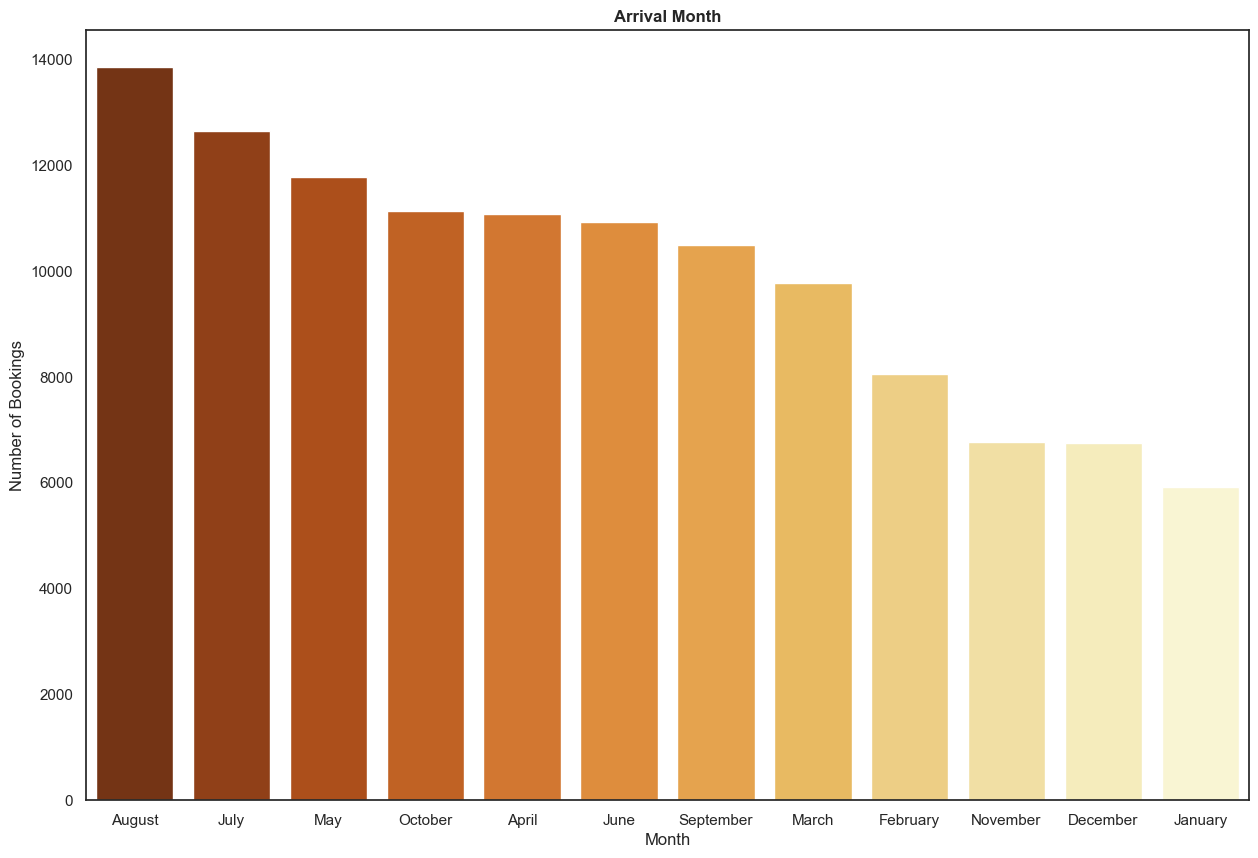

In [13]:
#`arrival_date_month` exploration 

plt.figure(figsize=(15,10))
sns.countplot(x='arrival_date_month', data = full_data_clean,
              order=pd.value_counts(full_data_clean['arrival_date_month']).index, palette='YlOrBr_r')
plt.title('Arrival Month', weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)

In [43]:
# get number of acutal guests by country
country_data = pd.DataFrame(full_data_clean[full_data_clean["is_canceled"] == 0]["country"].value_counts())
#country_data.index.name = "country"
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index

# pie plot
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

KeyError: 'Number of Guests'

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = full_data_clean, hue = "hotel", palette = 'Set1');

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", data = full_data_clean, hue = "hotel", palette = 'Set1');

In [ ]:
full_data_clean['number_of_nights'] = full_data_clean['stays_in_weekend_nights'] + full_data_clean['stays_in_week_nights']

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "number_of_nights", data = full_data_clean, hue = "hotel", palette = 'Set1');

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "customer_type", y = "number_of_nights", data = full_data_clean, hue = "hotel", palette = 'Set1');

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "customer_type", y = "stays_in_weekend_nights", data = full_data_clean, hue = "hotel", palette = 'Set1');

In [ ]:
plt.figure(figsize = (15,10))
ab = sns.boxplot(x = "customer_type", y = "stays_in_week_nights", data = full_data_clean, hue = "hotel", palette = 'Set1');
ab.set(xlabel='Customer Type')

In [ ]:
plt.figure(figsize = (13,10))
ax = sns.countplot(x="market_segment", hue="is_canceled", data=full_data_clean, palette = 'pink')
ax.set(xlabel='Market Segment', ylabel='Count')
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})
LAB = {'Canceled','Not Canceled'}
ax.legend(labels=LAB)

In [ ]:
plt.figure(figsize = (13,10))
ax = sns.countplot(x="market_segment", hue="deposit_type", data=full_data_clean, palette = 'pink')
ax.set(xlabel='Market Segment', ylabel='Count')
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})

In [ ]:
(sns.FacetGrid(full_data_clean, hue = 'is_canceled',
             height = 6,
             xlim = (0,500))
    .map(sns.kdeplot, 'lead_time', shade = True)
    .add_legend());

In [ ]:
plt.figure(figsize =(13,10))
sns.set(style="darkgrid")
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = full_data_clean)

In [ ]:
# rc["adr_pp"] = rc["adr"] / (rc["adults"] + rc["children"])
# cc["adr_pp"] = cc["adr"] / (cc["adults"] + cc["children"])

In [ ]:
full_data_clean["adr_pp"] = full_data_clean["adr"] / (full_data_clean["adults"] + full_data_clean["children"])
full_data_guests = full_data_clean[full_data_clean["is_canceled"] == 0] # only actual gusts
room_prices = full_data_guests[["hotel", "reserved_room_type", "adr_pp"]].sort_values("reserved_room_type")

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_pp",
            hue="hotel",
            data=room_prices, 
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 160)
plt.show()

In [ ]:
room_prices_mothly = full_data_guests[["hotel", "arrival_date_month", "adr_pp"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr_pp", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night and person over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize =(13,10))
ax = sns.barplot(x='arrival_date_month', y="adr",hue="hotel",data=full_data_clean)
plt.title("ADR vs Arrival Month", fontdict={'fontsize': 20})
#ADR is the average daily rate of the hotel

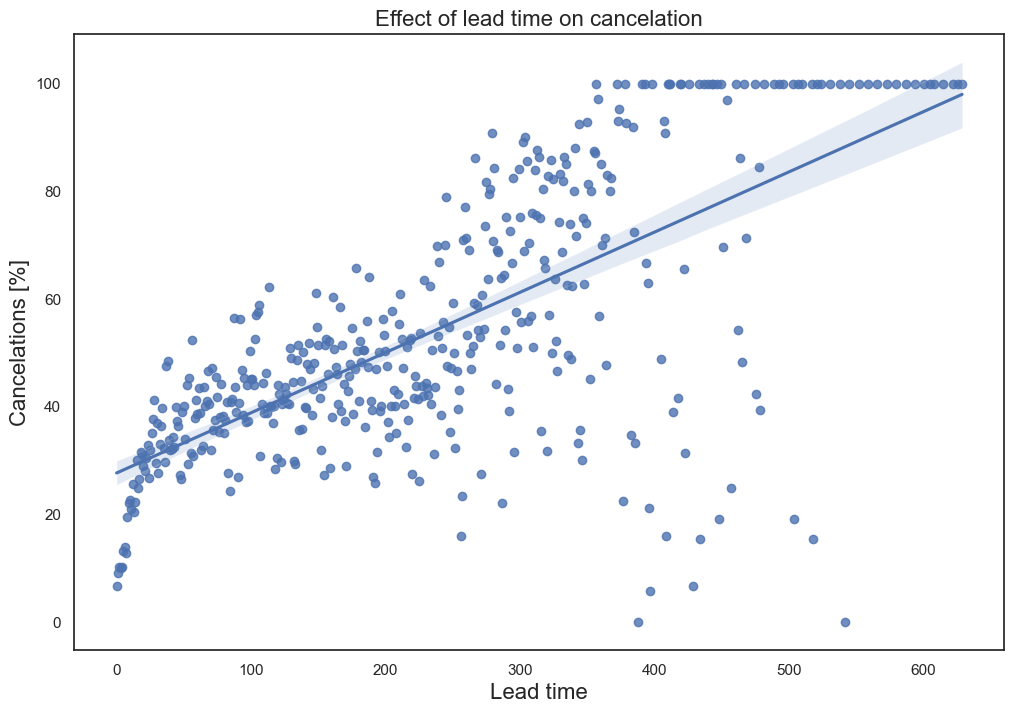

In [44]:
# group data for lead_time:
lead_cancel_data = full_data_clean.groupby("lead_time")["is_canceled"].describe()
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()

In [45]:
labelencoder = LabelEncoder()
full_data_clean['hotel'] = labelencoder.fit_transform(full_data_clean['hotel'])
full_data_clean['arrival_date_month'] = labelencoder.fit_transform(full_data_clean['arrival_date_month'])
full_data_clean['meal'] = labelencoder.fit_transform(full_data_clean['meal'])
full_data_clean['country'] = labelencoder.fit_transform(full_data_clean['country'])
full_data_clean['market_segment']= labelencoder.fit_transform(full_data_clean['market_segment'])
full_data_clean['distribution_channel']=labelencoder.fit_transform(full_data_clean['distribution_channel'])
full_data_clean['is_repeated_guest'] = labelencoder.fit_transform(full_data_clean['is_repeated_guest'])
full_data_clean['reserved_room_type'] = labelencoder.fit_transform(full_data_clean['reserved_room_type'])
full_data_clean['assigned_room_type'] = labelencoder.fit_transform(full_data_clean['assigned_room_type'])
full_data_clean['deposit_type'] = labelencoder.fit_transform(full_data_clean['deposit_type'])
full_data_clean['agent'] = labelencoder.fit_transform(full_data_clean['agent'])
full_data_clean['customer_type'] = labelencoder.fit_transform(full_data_clean['customer_type'])
full_data_clean['reservation_status'] = labelencoder.fit_transform(full_data_clean['reservation_status'])
full_data_clean['reservation_status_date'] = labelencoder.fit_transform(full_data_clean['reservation_status_date'])

In [46]:
full_data_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,0,0,0.0,0,2,0.0,0,0,1,15
1,1,0,737,2015,5,27,1,0,0,2,...,0,0,0.0,0,2,0.0,0,0,1,15
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,0.0,0,2,75.0,0,0,1,46
3,1,0,13,2015,5,27,1,0,1,1,...,0,221,0.0,0,2,75.0,0,0,1,46
4,1,0,14,2015,5,27,1,0,2,2,...,0,174,0.0,0,2,98.0,0,1,1,76


In [47]:
# Create new feature:`all_children` with merge children and baby features
full_data_clean['all_children'] = full_data_clean['children'] + full_data_clean['babies']
pd.crosstab(full_data_clean['adults'], full_data_clean['all_children'], margins=True, margins_name = 'Total').iloc[:8]

all_children,0.0,1.0,2.0,3.0,9.0,10.0,Total
adults,,,,,,,
0,0,4,205,14,0,0,223
1,22577,286,157,6,1,0,23027
2,81560,4658,3369,91,0,2,89680
3,5666,495,41,0,0,0,6202
4,59,3,0,0,0,0,62
5,2,0,0,0,0,0,2
6,1,0,0,0,0,0,1
10,1,0,0,0,0,0,1


In [50]:
data_categorical = full_data_clean[['hotel','is_canceled','arrival_date_month','meal',
                                     'country','market_segment','distribution_channel', 
                                     'is_repeated_guest', 'reserved_room_type',
                                     'assigned_room_type','deposit_type','agent',
                                     'customer_type','reservation_status','all_children']]
data_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   hotel                 119210 non-null  int32  
 1   is_canceled           119210 non-null  int64  
 2   arrival_date_month    119210 non-null  int32  
 3   meal                  119210 non-null  int32  
 4   country               119210 non-null  int32  
 5   market_segment        119210 non-null  int32  
 6   distribution_channel  119210 non-null  int32  
 7   is_repeated_guest     119210 non-null  int64  
 8   reserved_room_type    119210 non-null  int32  
 9   assigned_room_type    119210 non-null  int32  
 10  deposit_type          119210 non-null  int32  
 11  agent                 119210 non-null  int64  
 12  customer_type         119210 non-null  int32  
 13  reservation_status    119210 non-null  int32  
 14  all_children          119210 non-null  float64
dtypes: fl

In [60]:
data_numerical= full_data_clean.drop(['hotel','is_canceled', 'arrival_date_month','meal',
                                       'country','market_segment','distribution_channel', 
                                       'is_repeated_guest', 'reserved_room_type', 
                                       'assigned_room_type','deposit_type','agent', 
                                       'customer_type','reservation_status','all_children'], axis = 1)
data_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119210 entries, 0 to 119389
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119210 non-null  int64  
 1   arrival_date_year               119210 non-null  int64  
 2   arrival_date_week_number        119210 non-null  int64  
 3   arrival_date_day_of_month       119210 non-null  int64  
 4   stays_in_weekend_nights         119210 non-null  int64  
 5   stays_in_week_nights            119210 non-null  int64  
 6   adults                          119210 non-null  int64  
 7   children                        119210 non-null  float64
 8   babies                          119210 non-null  int64  
 9   previous_cancellations          119210 non-null  int64  
 10  previous_bookings_not_canceled  119210 non-null  int64  
 11  booking_changes                 119210 non-null  int64  
 12  company              

Text(0.5, 1.0, 'Correlation Matrix Spearman Method- Categorical Data ')

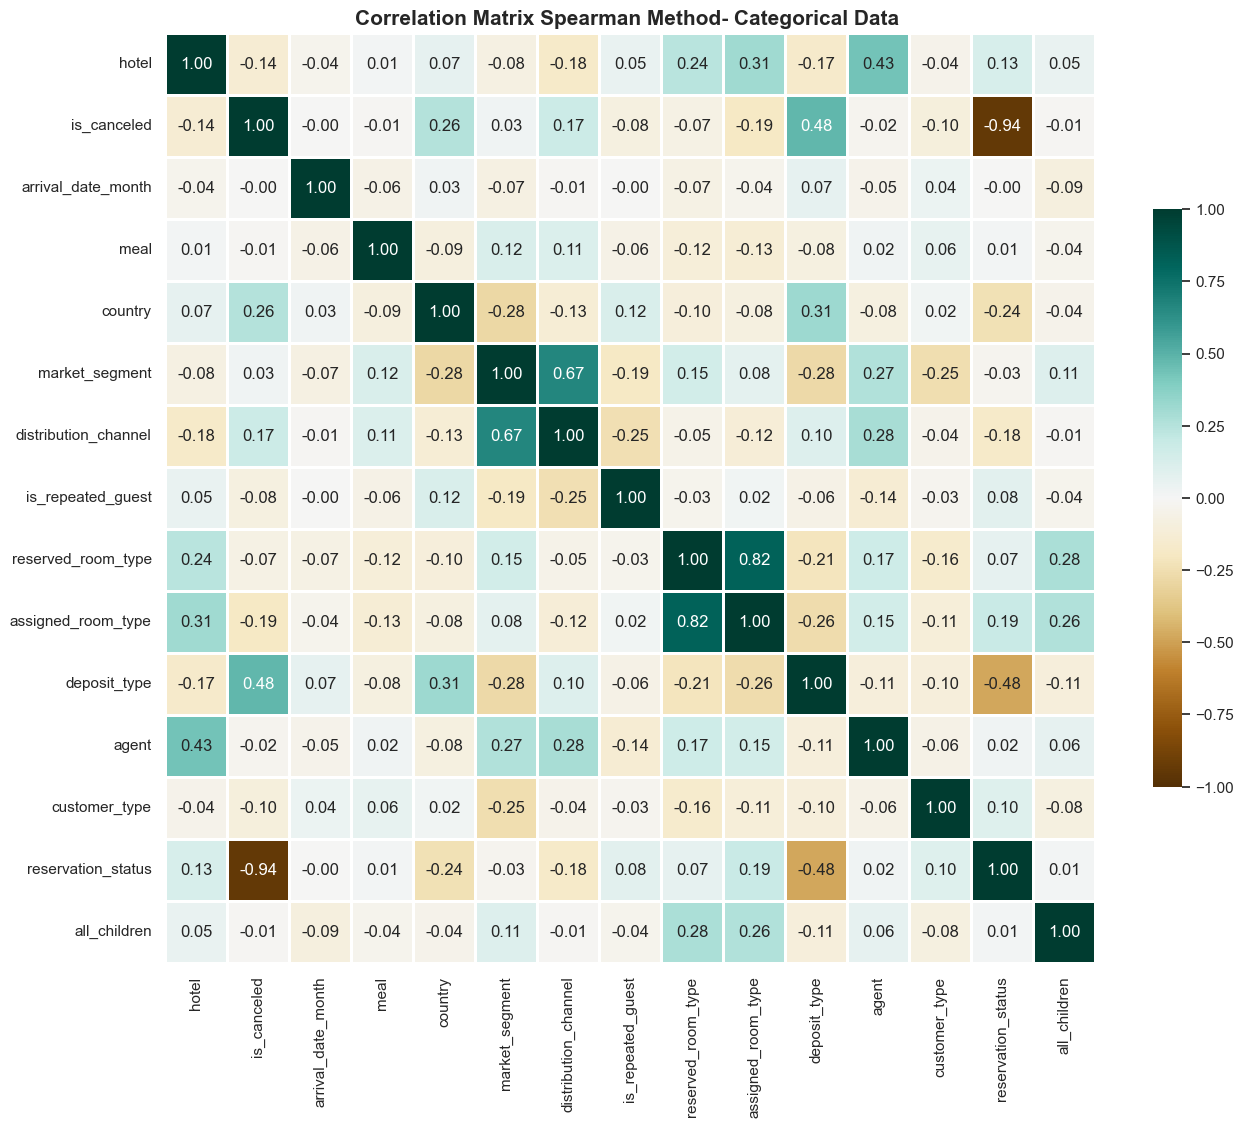

In [61]:
# Spearman Method
plt.figure(figsize=(15,15))
corr_categorical=data_categorical.corr(method='spearman')
sns.heatmap(corr_categorical, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(15, 0))
plt.title("Correlation Matrix Spearman Method- Categorical Data ",size=15, weight='bold')

In [62]:
print('customer_type:', full_data_clean['customer_type'].unique())
print('reservation_status', full_data_clean['reservation_status'].unique())
print('deposit_type', full_data_clean['deposit_type'].unique())
print('assigned_room_type', full_data_clean['assigned_room_type'].unique())
print('meal', full_data_clean['meal'].unique())
print('Country:',full_data_clean['country'].unique())
print('Dist_Channel:',full_data_clean['distribution_channel'].unique())
print('Market_seg:', full_data_clean['market_segment'].unique())
print('reserved_room_type:', full_data_clean['reserved_room_type'].unique())


customer_type: [2 0 3 1]
reservation_status [1 0 2]
deposit_type [0 2 1]
assigned_room_type [ 2  0  3  4  6  5  8  1  7 10  9]
meal [0 1 2 3]
Country: [135  59 169  51  76  56 171 139 124 127   6 133  43  15  29  34  66  81
 123  46 140 154  11  52  42  25  54 113  27 100 153   3  75  31 107 103
 166 148 101 134 149  30  12  23  99 162 175   1  80  40 176  37 177  48
  91  38  72   5 161  82  71  69  77  60   4  63 168  83  28  41  35  61
  92 121 106 172 152  55  86 128  73  94 131 144 155  13  20 126 158  47
 108 117   7  85  98  39  33  22 115  36 151 165  19  32  84 156 145  14
 142 174 132 138  50 130 110 116  49 105  79 170 125  21 102 157 163  44
 150  90  53  78  70 141  88 104  18  74 159 122  16 173 164  58  62 160
  64  87  97  65 112 167 118  57 111 129  17  95 109 119  24 136  26   0
   2 147  45 137  68  96   9  67   8 114 120  89 143  10 146  93]
Dist_Channel: [1 0 3 4 2]
Market_seg: [3 2 6 5 1 4 7 0]
reserved_room_type: [2 0 3 4 6 5 7 8 1]


In [63]:
new_data = full_data_clean.drop(['reservation_status', 'children', 'reservation_status_date'], axis=1)

In [55]:
cancel_corr = full_data.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

ValueError: could not convert string to float: 'Resort Hotel'

In [ ]:
full_data.groupby("is_canceled")["reservation_status"].value_counts()

In [28]:
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

# Separate features and predicted value
features = num_features + cat_features
X = full_data.drop(["is_canceled"], axis=1)[features]
y = full_data["is_canceled"]

#Creating Pipeline for the full_data
num_transformer = SimpleImputer(strategy="constant")

#Creating Pipeline for both kinds of data
# Preprocessing for categorical features:
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical features:
preprocessor = ColumnTransformer(transformers=[("num", num_transformer, num_features),
                                               ("cat", cat_transformer, cat_features)])

In [32]:
# define models to test:
base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("RF_model", RandomForestClassifier(random_state=42,n_jobs=-1)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("XGB_model", XGBClassifier(random_state=42, n_jobs=-1))]


kfolds = 4 
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)

# Preprocessing, fitting, making predictions and scoring for every model:
for name, model in base_models:
    
    model_steps = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
    
    cv_results = cross_val_score(model_steps, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)

    min_score = round(min(cv_results), 4)
    max_score = round(max(cv_results), 4)
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}, ")

DT_model cross validation accuarcy score: 0.8246 +/- 0.0016 (std) min: 0.8221, max: 0.8263, 
RF_model cross validation accuarcy score: 0.8664 +/- 0.0012 (std) min: 0.8646, max: 0.8676, 
LR_model cross validation accuarcy score: 0.7936 +/- 0.0011 (std) min: 0.7921, max: 0.7951, 
XGB_model cross validation accuarcy score: 0.8473 +/- 0.0011 (std) min: 0.8456, max: 0.8487, 


In [33]:
# Enhanced RF model with the best parameters I found:
rf_model_enh = RandomForestClassifier(n_estimators=160,
                               max_features=0.4,
                               min_samples_split=2,
                               n_jobs=-1,
                               random_state=0)

split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
model_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model_enh)])
cv_results = cross_val_score(model_pipe, 
                                 X, y, 
                                 cv=split,
                                 scoring="accuracy",
                                 n_jobs=-1)
# output:
min_score = round(min(cv_results), 4)
max_score = round(max(cv_results), 4)
mean_score = round(np.mean(cv_results), 4)
std_dev = round(np.std(cv_results), 4)
print(f"Enhanced RF model cross validation accuarcy score: {mean_score} +/- {std_dev} (std) min: {min_score}, max: {max_score}")

Enhanced RF model cross validation accuarcy score: 0.8681 +/- 0.0006 (std) min: 0.8673, max: 0.869
